In [1]:
import matplotlib.pyplot as plt
from tqdm import * #progress bar
from sccm import CryptoCurrencyModel
from sccm.agents import *
from sccm._parameters import Parameters
from sccm.market import Order
import numpy as np

In [2]:
model = CryptoCurrencyModel.PaperModel()

In [3]:
#%%prun -s cumulative
for i in tqdm(range(365*5)): #todo use batch runner from mesa for MC sim
    model.step()

100%|██████████| 1825/1825 [00:20<00:00, 87.03it/s] 


In [4]:
gini = model.datacollector.get_model_vars_dataframe()
def plotdata(l, lg=False):
    gini[l].plot(logy=lg)
    plt.legend(l)
    plt.show()

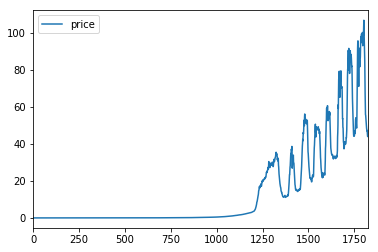

In [5]:
for p in ['price']:#, 'weighted_avg_price']:
    plotdata([p])

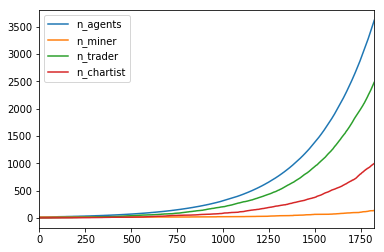

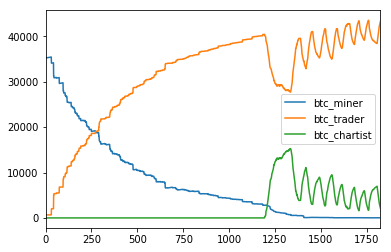

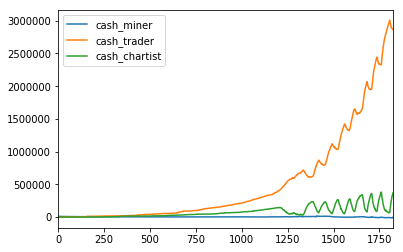

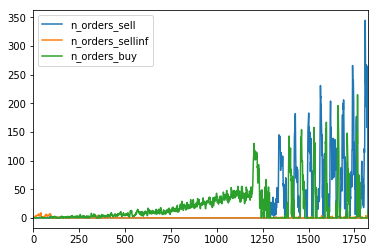

In [6]:
plotdata(['n_agents', 'n_miner', 'n_trader', 'n_chartist'])
plotdata(['btc_miner', 'btc_trader', 'btc_chartist'])
plotdata(['cash_miner', 'cash_trader', 'cash_chartist'])
plotdata(['n_orders_sell', 'n_orders_sellinf', 'n_orders_buy'])

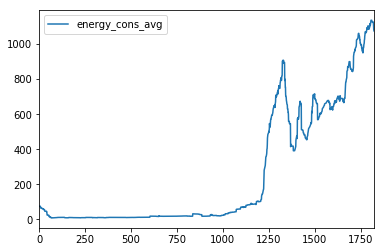

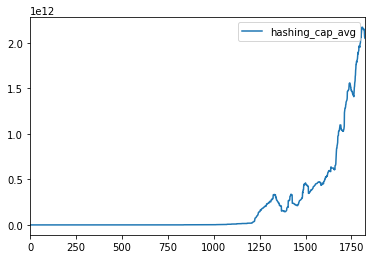

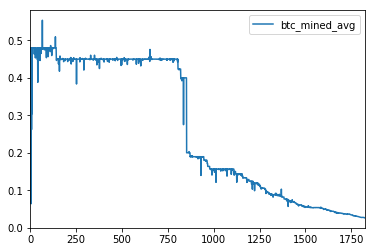

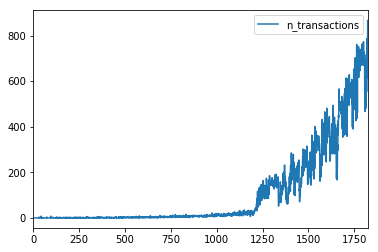

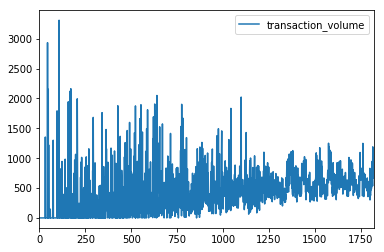

In [7]:
for p in ['energy_cons_avg', 'hashing_cap_avg','btc_mined_avg', 'n_transactions', 'transaction_volume']:#,'electricity_cost', 'hardware_bought']:
    plotdata([p])

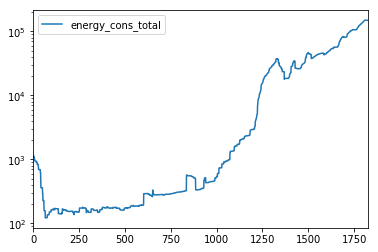

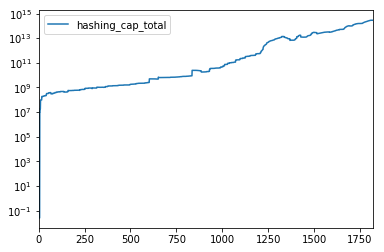

In [8]:
for p in ['energy_cons_total', 'hashing_cap_total']:
    plotdata([p],lg=True)

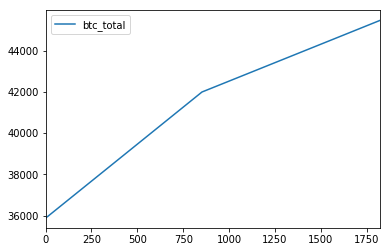

In [9]:
gini[['btc_miner', 'btc_trader', 'btc_chartist']].sum(axis=1).plot()
plt.legend(['btc_total'])
plt.show()

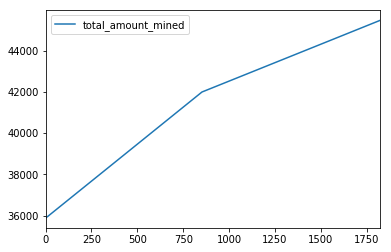

In [10]:
plotdata(['total_amount_mined'])

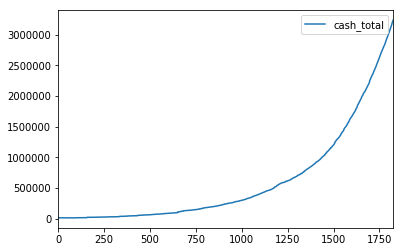

In [11]:
gini[['cash_miner', 'cash_trader', 'cash_chartist']].sum(axis=1).plot()
plt.legend(['cash_total'])
plt.show()

In [12]:
def getsum6(p):
    dat = list(gini[p])
    n = len(dat)
    m = int(np.floor(n/6))
    k = 6*m
    return np.array(dat[:k]).reshape(m, 6).sum(axis=1)

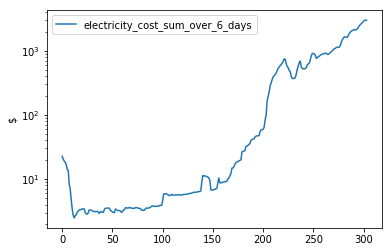

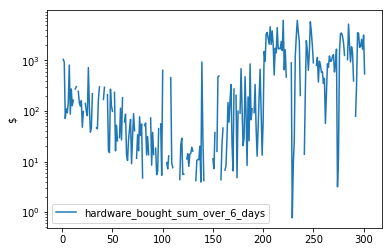

In [13]:
for p in ['electricity_cost', 'hardware_bought']:
    plt.semilogy(getsum6(p))
    plt.legend([p+'_sum_over_6_days'])
    plt.ylabel('$')
    plt.show()